In [1]:
path=  'C:/Users/felipe/Documents/Brain/'
import sys
sys.path.append(path) 

In [2]:
path_=  'C:/Users/felipe/Documents/Brain/Models/'
import sys
sys.path.append(path_) 

In [13]:
from xgboost_regressor import XGBoostRegressor
from Plotter import Plotter


In [14]:
import pandas as pd
import numpy as np
import pickle

file_name = 'datos_preprocesados_Felipe_Agosto_2024.xlsx'
file_path = f"{path}{file_name}"

df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 20].reset_index(drop=True)
df_filtrado = df_filtrado.drop(columns=["ID","Sex","Educ","MMSE","Cat_MMSE","Cat_Educ","Site","Country","Eurolad_code","HDI","GINI","Group","Country_cat"])
df_filtrado_sin_nulos = df_filtrado.dropna()
X = df_filtrado_sin_nulos.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado_sin_nulos["Age"]

xgb_model = XGBoostRegressor()
xgb_model.set_data(X,y)
Plotter = Plotter()

In [8]:
with open(f'{path}Opt_Model/opt_XGB_model_1_electrode.pickle', 'rb') as file:
    opt_xgb_1_electrode= pickle.load(file)

In [9]:
errores = opt_xgb_1_electrode.cv_results_['mean_test_score'][:100]


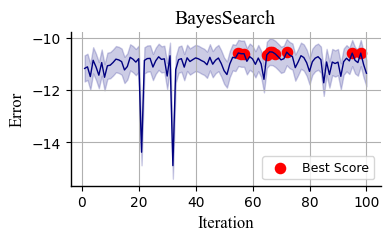

Top 1: Iteration 66, Score -10.54311913238096
Top 2: Iteration 67, Score -10.552574601243377
Top 3: Iteration 72, Score -10.555281735329116
Top 4: Iteration 55, Score -10.585808461152997
Top 5: Iteration 98, Score -10.591813517230896
Top 6: Iteration 95, Score -10.591841354410104
Top 7: Iteration 57, Score -10.614637832475944
Top 8: Iteration 56, Score -10.615857598189645
Top 9: Iteration 68, Score -10.62476023139051
Top 10: Iteration 65, Score -10.660197841053632


In [15]:
Plotter.plot_iteration(y=errores, title='BayesSearch', xlabel='Iteration', ylabel='Error', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2)

In [16]:
best_params_xgb = xgb_model.best_hyper(opt_xgb_1_electrode, num_max=100)

In [26]:
best_params_xgb

[{'colsample_bytree': 1.0,
  'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 1273,
  'subsample': 0.6},
 {'colsample_bytree': 1.0,
  'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 1404,
  'subsample': 0.6},
 {'colsample_bytree': 1.0,
  'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 1374,
  'subsample': 0.6},
 {'colsample_bytree': 1.0,
  'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 934,
  'subsample': 0.6},
 {'colsample_bytree': 0.9809982090164175,
  'learning_rate': 0.013771489964821025,
  'max_depth': 3,
  'n_estimators': 1316,
  'subsample': 0.6},
 {'colsample_bytree': 0.6,
  'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 1295,
  'subsample': 0.6},
 {'colsample_bytree': 1.0,
  'learning_rate': 0.018916180741032892,
  'max_depth': 3,
  'n_estimators': 1039,
  'subsample': 0.6},
 {'colsample_bytree': 1.0,
  'learning_rate': 0.018250278426012963,
  'max_depth': 3,
  'n_estimators': 1050,
  'subsample': 0.6},
 {'colsample_bytre

In [17]:
xgb_model.fit_params_train = {
                "early_stopping_rounds": 12,
                "eval_metric": "mae",
                "eval_set": [(xgb_model.X_test, xgb_model.y_test)],
                "verbose": True
            }

In [ ]:
results, best_model_results, best_model, residual_model = xgb_model.trainer_2(params_=best_params_xgb[0])

In [19]:
with open(f'{path}Opt_Model_2/BestModel_XGB_all_features_1electrode.pickle', 'wb') as file:
    pickle.dump(best_model, file)
with open(f'{path}Opt_Model_2/results_XGB_model_all_features_1electrode.pickle', 'wb') as file:
    pickle.dump(results, file)
with open(f'{path}Opt_Model_2/residual_model_XGB_model_all_features_1electrode.pickle', 'wb') as file:
    pickle.dump(residual_model, file)

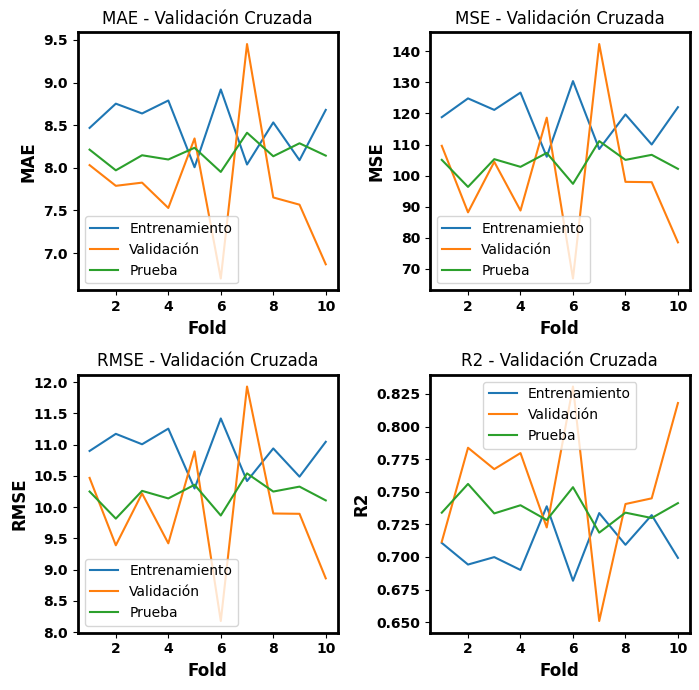

In [20]:
Plotter.plot_metricas_evaluacion(results)

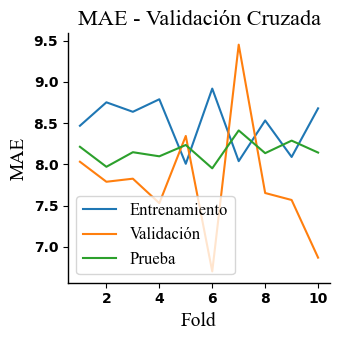

In [21]:
Plotter.plot_metrica_evaluacion(results, font='Times New Roman',mode=2,fontsize=14,x_size=3.5,y_size=3.5 )

In [22]:
y_pred=xgb_model.predicter_corrected_2(X_test= xgb_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     896.4
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           1.05e-86
Time:                        15:00:26   Log-Likelihood:                -976.64
No. Observations:                 265   AIC:                             1957.
Df Residuals:                     263   BIC:                             1964.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1684      1.552      3.331      0.0

C:\Users/felipe/Documents/Brain/Models\Plotter.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


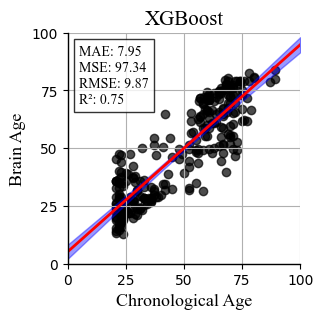

Error medio absoluto: 7.952323801180113
Error cuadrático medio: 97.33899863895654
Raíz del error cuadrático medio: 9.86605283986238
Coeficiente de determinación (R²): 0.7535172119437669


In [23]:
Plotter.plot_regresion(y=y_pred,x= xgb_model.y_test, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title='XGBoost',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [24]:
shap_values, shap_summary_sorted = xgb_model.feature_importance_shap(X_test=xgb_model.X_test,model=xgb_model.model)

Importancia de características basada en suma de valores SHAP:
PE: 1246.5782470703125
IAF: 836.5477294921875
Beta2_canon_RPD: 711.8410034179688
Beta1_canon_RPD: 600.5899047851562
Beta_subj_spec_RPD: 478.8628234863281
Alpha2_canon_RPD: 476.648681640625
SSV: 364.7209777832031
WMEAN: 343.91937255859375
Beta3_canon_RPD: 343.2712097167969
Low_subj_spec_RPD: 167.57728576660156
Theta_subj_spec_RPD: 156.72694396972656
Theta_canon_RPD: 140.2476348876953
Offset: 112.3864974975586
Knee: 85.2269515991211
FD: 75.35213470458984
Gamma_canon_RPD: 60.95183563232422
Gamma_subj_spec_RPD: 56.36168670654297
Alpha1_canon_RPD: 56.133968353271484
Low_subj_spec_EPP: 52.974342346191406
High_subj_spec_RPD: 48.967071533203125
Delta_canon_RPD: 39.447898864746094
Delta_subj_spec_RPD: 36.9598388671875
Slope: 34.42363739013672
TF: 17.314123153686523
Delta_canon_EPP: 0.0
Theta_canon_EPP: 0.0
Alpha1_canon_EPP: 0.0
Alpha2_canon_EPP: 0.0
Beta1_canon_EPP: 0.0
Beta2_canon_EPP: 0.0
Beta3_canon_EPP: 0.0
Gamma_canon_EPP: 0.0


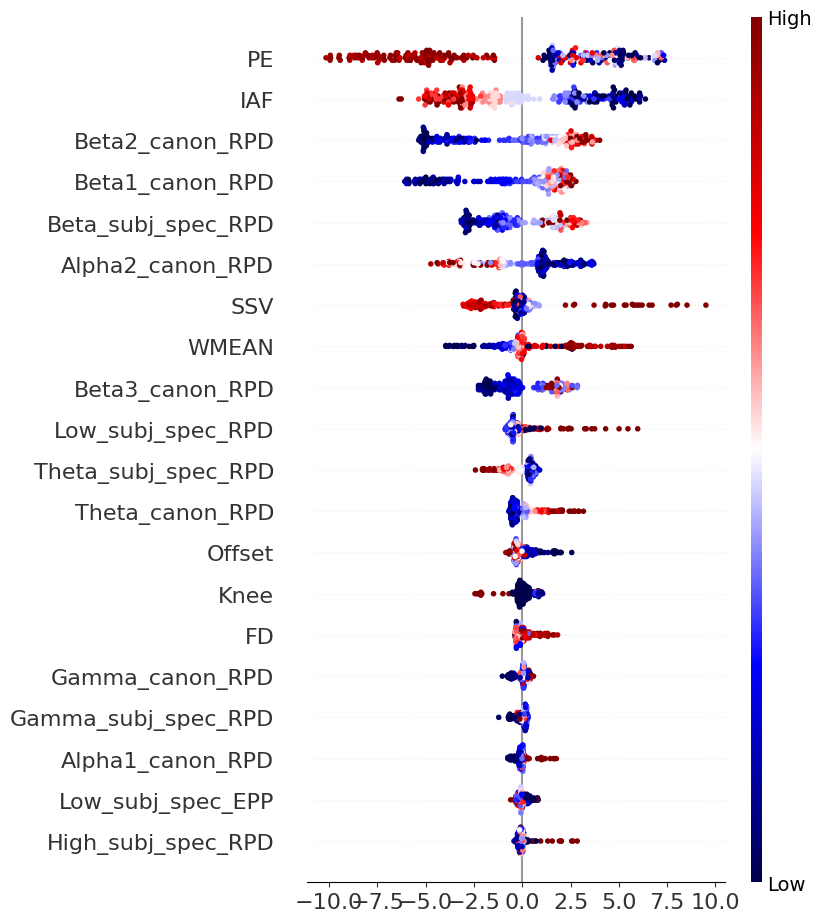

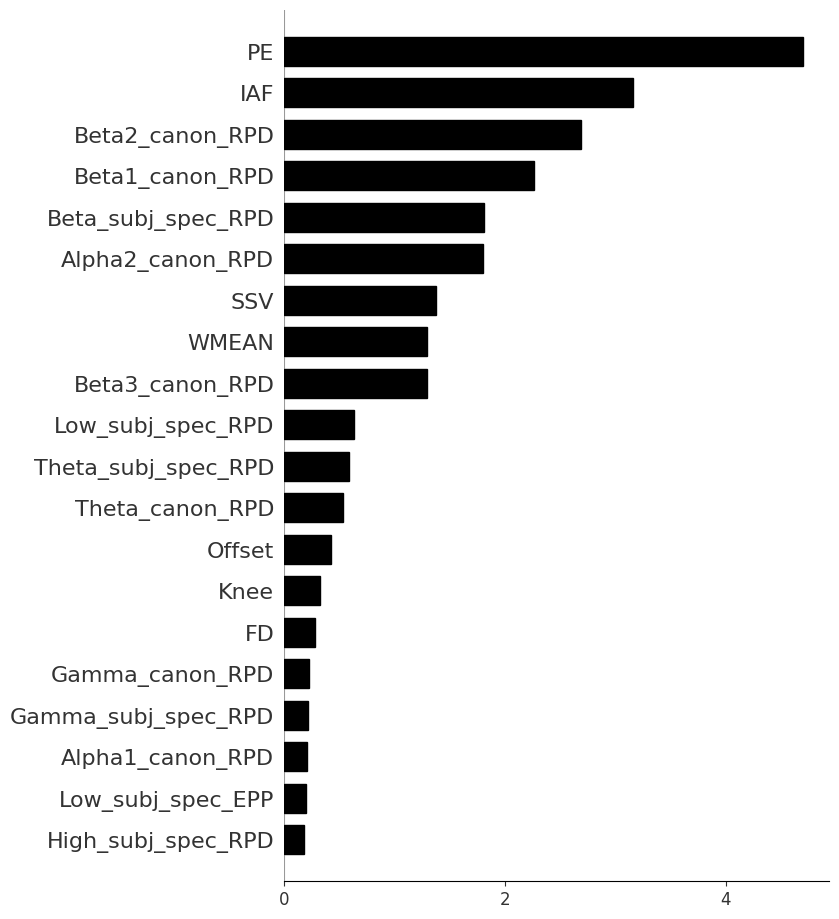

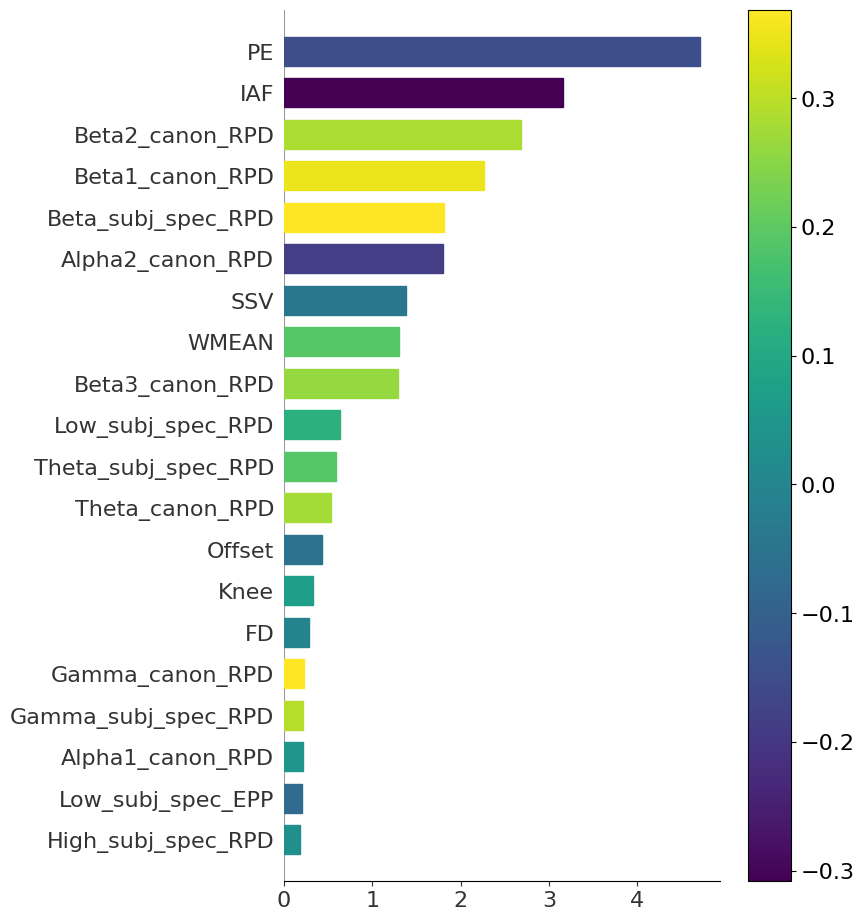

In [25]:
Plotter.plot_feature_importance(shap_values=shap_values,X_test=xgb_model.X_test,y_test=xgb_model.y_test)